In [1]:
from gurobipy import *
import math
import networkx as nx
import matplotlib.pyplot as plt
import random
import pandas as pd
import re
import io

We create the graph with its nodes, edges, and attributes

In [2]:
graph=nx.Graph()

This are the node locations for the selected topology:
[(0, 'N1'), (1, 'N2'), (2, 'N3'), (3, 'N4'), (4, 'N5'), (5, 'N6'), (6, 'N7'), (7, 'N8'), (8, 'N9'), (9, 'N10'), (10, 'N11'), (11, 'N12'), (12, 'N13'), (13, 'N14'), (14, 'N15')]
\
This are the existing links for the selected topology:
[(0, 7, None), (0, 6, None), (0, 5, None), (1, 2, None), (1, 4, None), (1, 5, None), (2, 7, None), (2, 4, None), (3, 5, None), (3, 4, None), (5, 12, None), (6, 9, None), (6, 13, None), (7, 8, None), (7, 14, None), (8, 14, None), (8, 9, None), (8, 11, None), (9, 11, None), (10, 13, None), (10, 12, None), (12, 13, None)]


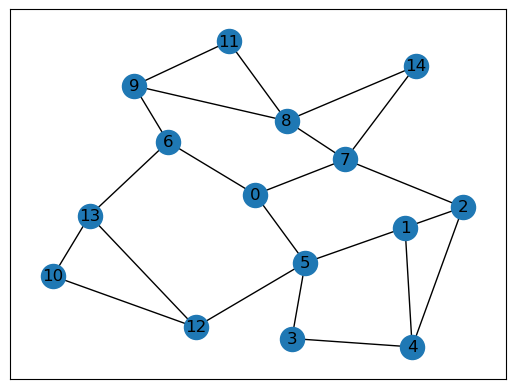

In [3]:
#to select US-Canada graph, write './us-ca.gml', for EU graph './eu.gml', and for Atlanta graph './atlanta.gml'
V=nx.read_gml('./atlanta.gml',destringizer=int)
N=13
print('This are the node locations for the selected topology:')
print(V.nodes(data='name'))
print('\\')
print('This are the existing links for the selected topology:')
print(V.edges(data='name'))
node_positions = {}

for node, attributes in V.nodes(data=True):
    
    graphics = attributes.get('graphics', {})
    x = graphics.get('x', 0)
    y = graphics.get('y', 0)
    
    node_positions[node] = (x, y)
nx.draw_networkx(V, pos=node_positions, with_labels=True)

In [4]:
d_central=nx.degree_centrality(V)

top_dc={}
min_dc={}
for key in sorted(d_central, key=d_central.get):
    min_dc[key]=d_central[key]
for key in sorted(d_central, key=d_central.get, reverse=True):
    top_dc[key]=d_central[key]

c_central=nx.closeness_centrality(V)

top_cc={}
min_cc={}
for key in sorted(c_central, key=c_central.get):
    min_cc[key]=c_central[key]
for key in sorted(c_central, key=c_central.get, reverse=True):
    top_cc[key]=c_central[key]

b_central=nx.degree_centrality(V)

#top_bc={}
#min_bc={}
#for key in sorted(b_central, key=b_central.get):
#    top_bc[key]=b_central[key]
#for key in sorted(b_central, key=b_central.get, reverse=True):
#    min_bc[key]=b_central[key]
    

top_degree=[]
top_close=[]
#top_between=[]
min_degree=[]
min_close=[]
#min_between=[]

S_likely_deg=[]
S_likely_deg_low=[]
for key in  top_dc.keys():
    top_degree.append(key)
for key in  min_dc.keys():
    min_degree.append(key)



for i in range(0,N):
    S_likely_deg.append(top_degree[i])
for i in range(0,N):
    S_likely_deg_low.append(min_degree[i])
    

print("Nodes with higher degree centrality")
print(S_likely_deg)
print("Nodes with lowest degree centrality")
print(S_likely_deg_low)

S_likely_cls=[]
S_likely_cls_low=[]
for key in  top_cc.keys():
    top_close.append(key)
for key in  min_cc.keys():
    min_close.append(key)
    

for i in range(0,N):
    S_likely_cls.append(top_close[i])
for i in range(0,N):
    S_likely_cls_low.append(min_close[i])
print("Nodes with higher closeness centrality")
print(S_likely_cls)
print("Nodes with lowest closeness centrality")
print(S_likely_cls_low)     

Nodes with higher degree centrality
[5, 7, 8, 0, 1, 2, 4, 6, 9, 12, 13, 3, 10]
Nodes with lowest degree centrality
[3, 10, 11, 14, 0, 1, 2, 4, 6, 9, 12, 13, 5]
Nodes with higher closeness centrality
[0, 5, 7, 6, 2, 1, 8, 9, 12, 13, 3, 4, 14]
Nodes with lowest closeness centrality
[10, 11, 3, 4, 14, 13, 9, 12, 1, 8, 2, 6, 5]


In [5]:
#We propose several models to locate the DCNs, either by high or low node closeness or node degree centrality:
#SELECT LOW=1 TO LOOK AT LOW CENTRALITY RESULTS, SPECIFY CLOSE FOR CLOSENESS CENTRALITY RESULTS
#AS SUCH:
#IF: L=0, CLOSE=0
#DCN Placement in high degree centrality nodes
LOW=0
CLOSE=0
if LOW==0 and CLOSE==0:
    print("Allocation method chosen: High degree centrality")
    print("Nodes chosen to be DCN:")
    for i in V.nodes():
        
        if i in S_likely_deg:
            V.nodes[i]['S']=1
            print(V.nodes[i]["name"])
        else:
            V.nodes[i]['S']=0
    print(V.nodes(data='S'))
    
elif LOW==0 and CLOSE==1:
    print("Allocation method chosen: High closeness centrality")
    print("Nodes chosen to be DCN:")
    for i in V.nodes():
        if i in S_likely_cls:
            V.nodes[i]['S']=1
            print(V.nodes[i]["name"])
        else:
            V.nodes[i]['S']=0
    print(V.nodes(data='S'))
    
elif LOW==1 and CLOSE==0:
    print("Allocation method chosen: Low degree centrality")
    print("Nodes chosen to be DCN:")
    for i in V.nodes():
        if i in S_likely_deg_low:
            V.nodes[i]['S']=1
            print(V.nodes[i]["name"])
        else:
            V.nodes[i]['S']=0
    print(V.nodes(data='S'))

elif LOW==1 and CLOSE==1:
    print("Allocation method chosen: Low closeness centrality")
    print("Nodes chosen to be DCN:")
    for i in V.nodes():
        if i in S_likely_cls_low:
            V.nodes[i]['S']=1
            print(V.nodes[i]["name"])
        else:
            V.nodes[i]['S']=0
    print(V.nodes(data='S'))
    

Allocation method chosen: High degree centrality
Nodes chosen to be DCN:
N1
N2
N3
N4
N5
N6
N7
N8
N9
N10
N11
N13
N14
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 0), (12, 1), (13, 1), (14, 0)]


In [6]:
nw_mod=Model(name="nw")


C=100
c=10


delta_ij = nw_mod.addVars(V.number_of_nodes(),V.number_of_nodes(),name='delta_{i}_{j}',vtype=GRB.BINARY)
x=nw_mod.addVars(V.number_of_nodes(),name='x',vtype=GRB.BINARY)
y=nw_mod.addVars(V.number_of_nodes(),name='y',vtype=GRB.BINARY)
z=nw_mod.addVars(V.number_of_nodes(),name='z',vtype=GRB.BINARY)

obj_fun=sum(c*delta_ij[i,j] for i,j in V.edges())
nw_mod.setObjective(obj_fun, GRB.MINIMIZE)

for i in V.nodes():
    nw_mod.addConstr(x[i] + y[i] + z[i] == 1, 'constraint_one_subd{i}')
    
#nw_mod.addConstr(sum(V.nodes[i]['S'] * x[i] for i in V.nodes()) <= (math.floor(N/2)) - 1, 'constraint_sum_S_x')
#nw_mod.addConstr(sum(V.nodes[i]['S'] * y[i] for i in V.nodes()) <= (math.floor(N/2)) - 1, 'constraint_sum_S_y')
#nw_mod.addConstr(sum(V.nodes[i]['S'] * z[i] for i in V.nodes()) <= (math.floor(N/2)) - 1, 'constraint_sum_S_z')

nw_mod.addConstr(sum(V.nodes[i]['S'] * x[i] for i in V.nodes()) <= (math.ceil(N/2)) - 1, 'constraint_sum_S_x')
nw_mod.addConstr(sum(V.nodes[i]['S'] * y[i] for i in V.nodes()) <= (math.ceil(N/2)) - 1, 'constraint_sum_S_y')
nw_mod.addConstr(sum(V.nodes[i]['S'] * z[i] for i in V.nodes()) <= (math.ceil(N/2)) - 1, 'constraint_sum_S_z')

#nw_mod.addConstr(sum(x[i] for i in V.nodes())>=sum(y[i] for i in V.nodes()),'constraint_max_x')
#nw_mod.addConstr(sum(y[i] for i in V.nodes())>=sum(z[i] for i in V.nodes()),'constraint_max_y')

#nw_mod.addConstr(sum(x[i] for i in V.nodes())>=sum(y[i] for i in V.nodes())+sum(z[i] for i in V.nodes()),'constraint_max_x')

#nw_mod.addConstr(sum(int(V.nodes[i]['S']) * x[i] for i in V.nodes()) <= (math.floor(N/2)) - 1, 'constraint_sum_S_x')
#nw_mod.addConstr(sum(int(V.nodes[i]['S']) * y[i] for i in V.nodes()) <= (math.floor(N/2)) - 1, 'constraint_sum_S_y')
#nw_mod.addConstr(sum(int(V.nodes[i]['S']) * z[i] for i in V.nodes()) <= (math.floor(N/2)) - 1, 'constraint_sum_S_z')


Set parameter Username
Academic license - for non-commercial use only - expires 2024-11-29


<gurobi.Constr *Awaiting Model Update*>

In [7]:
'''for i in V.nodes():
    for j in V.nodes():
        if V.has_edge(i,j)
                nw_mod.addConstr(delta_ij[i,j] <= 2 - x[i] - x[j], 'constraint_delta_ij_x_{i}_{j}_same_x ') 
                nw_mod.addConstr(delta_ij[i,j] <= 2 - y[i] - y[j], 'constraint_delta_ij_x_{i}_{j}_same_y ')
                nw_mod.addConstr(delta_ij[i,j] <= 2 - x[i] - z[j], 'constraint_delta_ij_x_{i}_{j}_same_z ')
                nw_mod.addConstr(delta_ij[i,j] >= x[i] - x[j], 'constraint_delta_ij_x_{i}_{j}_not_same_x ')
                nw_mod.addConstr(delta_ij[i,j] >= y[i] - y[j], 'constraint_delta_ij_x_{i}_{j}_not_same_y ')
                nw_mod.addConstr(delta_ij[i,j] >= z[i] - z[j], 'constraint_delta_ij_x_{i}_{j}_not_same_z ')
'''
for i, j in V.edges():
    nw_mod.addConstr(delta_ij[i, j] <= 2 - x[i] - x[j], f'constraint_delta_ij_x_{i}_{j}_same_x')
    nw_mod.addConstr(delta_ij[j, i] <= 2 - x[i] - x[j], f'constraint_delta_ij_x_{i}_{j}_same_x_2')
    nw_mod.addConstr(delta_ij[i, j] <= 2 - y[i] - y[j], f'constraint_delta_ij_x_{i}_{j}_same_y')
    nw_mod.addConstr(delta_ij[j, i] <= 2 - y[i] - y[j], f'constraint_delta_ij_x_{i}_{j}_same_y_2')
    nw_mod.addConstr(delta_ij[i, j] <= 2 - z[i] - z[j], f'constraint_delta_ij_x_{i}_{j}_same_z')
    nw_mod.addConstr(delta_ij[j, i] <= 2 - z[i] - z[j], f'constraint_delta_ij_x_{i}_{j}_same_z_2')
    nw_mod.addConstr(delta_ij[i, j] >= x[i] - x[j], f'constraint_delta_ij_x_{i}_{j}_not_same_x')
    nw_mod.addConstr(delta_ij[j, i] >= x[i] - x[j], f'constraint_delta_ij_x_{i}_{j}_not_same_x_2')
    nw_mod.addConstr(delta_ij[i, j] >= y[i] - y[j], f'constraint_delta_ij_x_{i}_{j}_not_same_y')
    nw_mod.addConstr(delta_ij[j, i] >= y[i] - y[j], f'constraint_delta_ij_x_{i}_{j}_not_same_y_2')
    nw_mod.addConstr(delta_ij[i, j] >= z[i] - z[j], f'constraint_delta_ij_x_{i}_{j}_not_same_z')
    nw_mod.addConstr(delta_ij[j, i] >= z[i] - z[j], f'constraint_delta_ij_x_{i}_{j}_not_same_z_2')


In [8]:



#nw_mod.setParam('OutputFlag',False)
nw_mod.optimize()
#nw_mod.computeIIS()
print('Optimization is done. Objective function value: %.2f' % nw_mod.objVal)
deltas={}
x_arr={}
y_arr={}
z_arr={}

for v in nw_mod.getVars():
    if re.match('delta',v.varName) is not None and v.x!=0:
        deltas[v.varName]=v.x
    if re.match('x',v.varName) is not None:
        x_arr[v.varName]=v.x
    if re.match('y',v.varName) is not None:
        y_arr[v.varName]=v.x
    if re.match('z',v.varName) is not None:
        z_arr[v.varName]=v.x
dist=[]
dist.append(x_arr)
dist.append(y_arr)
dist.append(z_arr)

dfdelta=pd.DataFrame.from_dict(deltas,orient='index')
#print(dfdist)
print("List of connections brought down:")
print(dfdelta)

tmpx=[]
tmpy=[]
tmpz=[]
for i in x_arr:
    
    if x_arr[i]==1:
        tmpx.append(list(x_arr).index(i))
print("Nodes in partition x:")
print(tmpx)
print ("DCN nodes in this partition")
for i in V.nodes():
    if  V.nodes[i]['S']==1:
        if i in tmpx:
            print(i)
            print(V.nodes[i]['name'])
for i in y_arr:
    
    if y_arr[i]==1:
        tmpy.append(list(y_arr).index(i))
print("Nodes in partition y:")
print(tmpy)
print ("DCN nodes in this partition")
for i in V.nodes():
    if  V.nodes[i]['S']==1:
        if i in tmpy:
            print(i)
            print(V.nodes[i]['name'])
for i in z_arr:
    
    if z_arr[i]==1:
        tmpz.append(list(z_arr).index(i))
print("Nodes in partition z:")
print(tmpz)
print ("DCN nodes in this partition")
for i in V.nodes():
    if  V.nodes[i]['S']==1:
        if i in tmpz:
            print(i)
            print(V.nodes[i]['name'])


Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: 11th Gen Intel(R) Core(TM) i5-1135G7 @ 2.40GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 282 rows, 270 columns and 876 nonzeros
Model fingerprint: 0x08c7e9c1
Variable types: 0 continuous, 270 integer (270 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+00]
Found heuristic solution: objective 130.0000000
Presolve removed 0 rows and 181 columns
Presolve time: 0.00s
Presolved: 282 rows, 89 columns, 876 nonzeros
Variable types: 0 continuous, 89 integer (89 binary)

Root relaxation: objective 0.000000e+00, 56 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | I

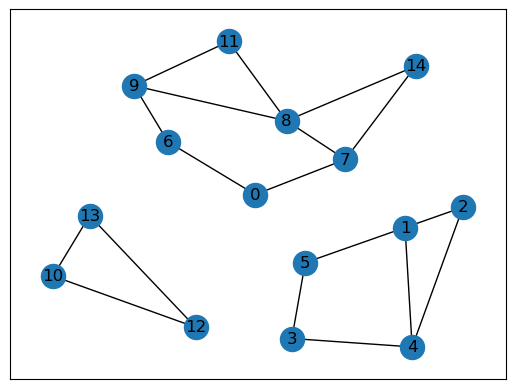

In [9]:
edges_to_remove = []
for i, j in V.edges():

    if delta_ij[i, j].X == 1:
        
        edges_to_remove.append((i, j))

for edge in edges_to_remove:
    V.remove_edge(*edge)
nx.draw_networkx(V, pos=node_positions, with_labels=True)
